In [1]:
import pandas as pd

df = pd.read_parquet('./../data/dataset_site_info.parquet')


In [2]:
from cmSim import utils

mcm_data = utils.get_mcm_data('./../data/aodsim_mcm_data.json')
df['pwg'] = df['dataset_name'].apply(
    utils.get_pwg_from_dataset, mcm_data=mcm_data)

df.head(None)


Unzipping and loading json file... Done


,dataset_name,dataset_id,replica_time_create,node_name,rep_size,min_time,max_time,br_user_group_id,tier,pwg
0,/JetHT/Run2016B-23Sep2016-v1/MINIAOD,934228,20200306,T1_RU_JINR_Disk,2.235519e+11,2020-03-07,2020-12-31,42.0,MINIAOD,None
1,/QCD_Pt_120to170_TuneCP5_13TeV_pythia8/RunIISu...,1566016,20200701,T2_IN_TIFR,5.754734e+11,2020-07-02,2020-12-31,42.0,MINIAODSIM,None
2,/EGamma/Run2018A-EcalUncalZElectron-12Nov2019_...,1466140,20200925,T2_IN_TIFR,1.779573e+12,2020-10-03,2020-12-31,42.0,ALCARECO,None
3,/QCD_HT1500to2000_TuneCP5_PSWeights_13TeV-madg...,1495975,20200114,T1_US_FNAL_Disk,1.753403e+11,2020-01-18,2020-12-31,42.0,MINIAODSIM,None
4,/QCD_Pt_50to80_TuneCUETP8M1_13TeV_pythia8/RunI...,1064309,20170911,T2_CH_CERN,1.026091e+12,2019-01-01,2020-12-31,102.0,ALCARECO,None
...,...,...,...,...,...,...,...,...,...,...
6752625,/WZTo3LNu_mllmin01_NNPDF31_TuneCP5_13TeV_powhe...,1258355,20190116,T2_UK_SGrid_RALPP,3.800483e+09,2019-01-16,2019-01-16,NaN,AODSIM,None
6752626,/SMS-T1qqqq_mGluino-1400_mLSP-100_TuneCUETP8M1...,1106198,20190212,T2_EE_Estonia,5.924122e+10,2019-02-13,2019-02-14,42.0,GEN-SIM,None
6752627,/HIDoubleMuon/HIRun2018A-04Apr2019-v1/DQMIO,1318323,20190418,T1_DE_KIT_Disk,1.941605e+07,2019-04-18,2019-04-18,NaN,DQMIO,None
6752628,/SMS-T5qqqqHg_refPoints_TuneCP2_13TeV-madgraph...,1511968,20200322,T1_IT_CNAF_Disk,7.544165e+08,2020-06-11,2020-06-11,NaN,MINIAODSIM,None


In [3]:
from cmSim.country import Country

country = Country.from_dataframe(df, name='USA')
print(country)


Country(name=USA, code=US, #T1s=1, #T2s=8)


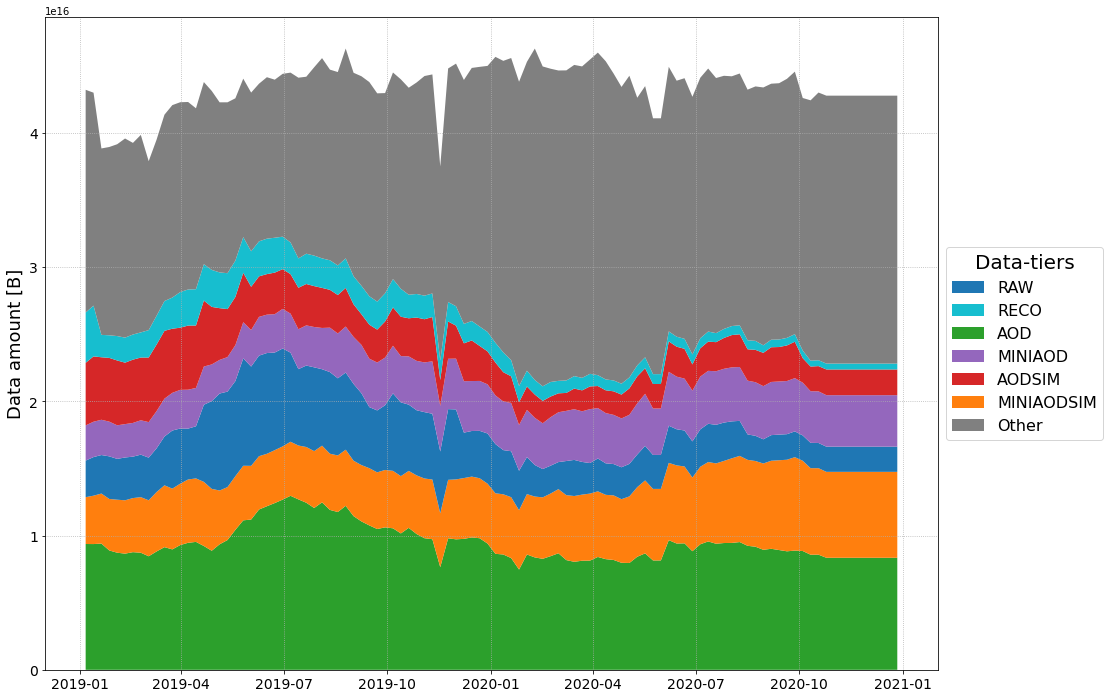

In [4]:
import pylab as plt

datatiers = ['RAW', 'RECO', 'AOD', 'MINIAOD', 'AODSIM', 'MINIAODSIM']

fig, ax = plt.subplots(figsize=(16, 12))
country.plot_storage_history_by_datatier(ax, datatiers=datatiers)


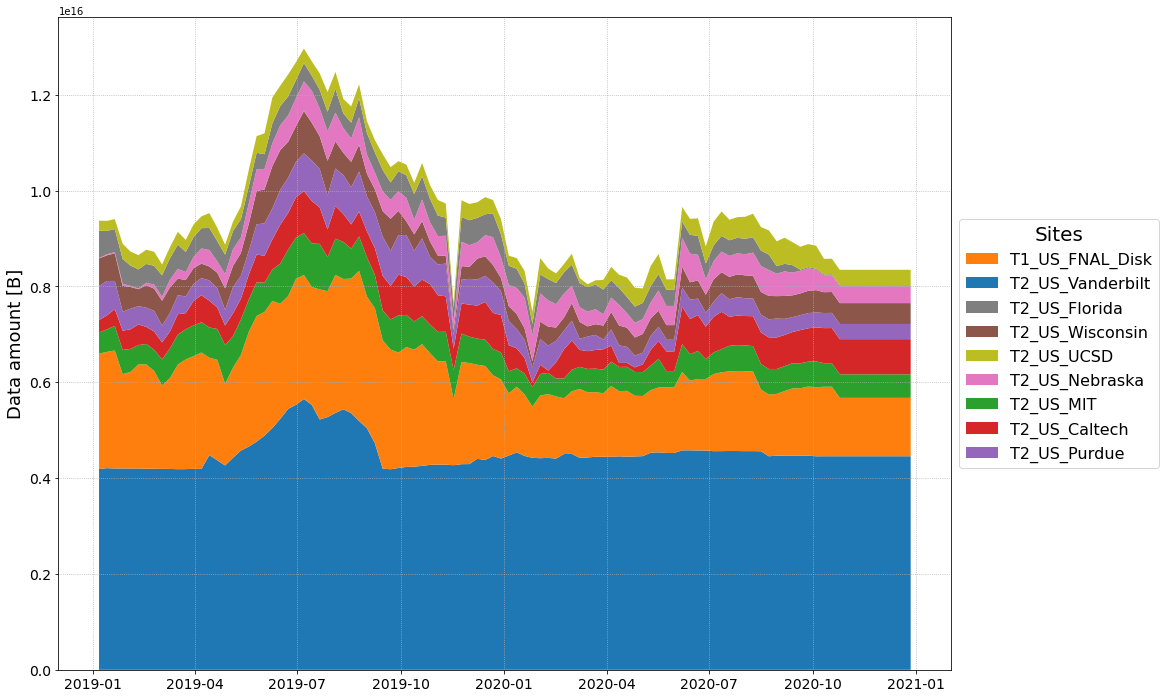

In [5]:
fig, ax = plt.subplots(figsize=(16, 12))
country.plot_storage_history_by_site(ax, datatiers=['AOD'])


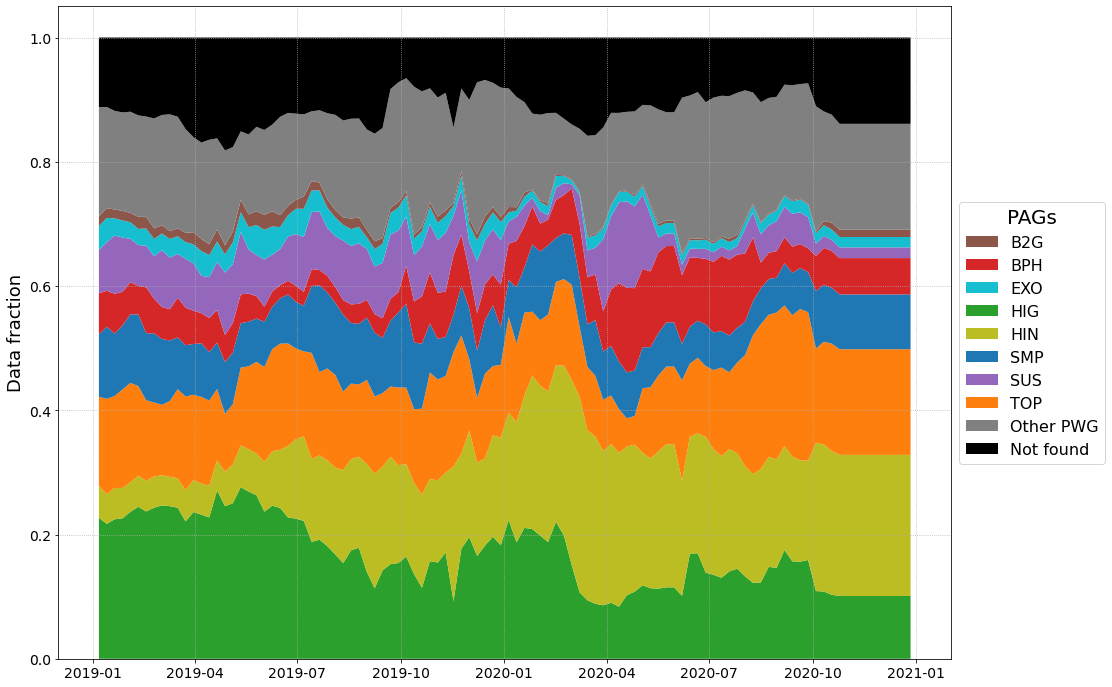

In [6]:
pags = utils.get_pags()

fig, ax = plt.subplots(figsize=(16, 12))
country.plot_storage_history_by_pag(
    ax, pags=pags, datatiers=['AODSIM'], norm=True)
